In [ ]:
# # run once
# !pip install black[jupyter] --quiet
# from google.colab import drive

# drive.mount("/content/drive")

In [ ]:
# run many times
# !black /content/drive/MyDrive/'Colab Notebooks'/'Housing.ipynb'

Usage: black [OPTIONS] SRC ...
Try 'black -h' for help.

Error: Invalid value for 'SRC ...': Path '/content/drive/MyDrive/Colab Notebooks/HiringBias.ipynb' does not exist.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.animation import FuncAnimation

# Load dataset
df = pd.read_csv("Housing.csv")

# Take a look at the first rows
print(df.head())

print(df.describe())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545

In [ ]:
def min_max_scaling(data_col):
    min_val = np.min(data_col, axis=0)
    max_val = np.max(data_col, axis=0)
    data_col_scaled = (data_col - min_val) / (max_val - min_val)
    return data_col_scaled

def min_max_inverse_scale(scaled, min_val, max_val):
    return scaled * (max_val - min_val) + min_val

In [ ]:
area_col = df["area"].values.reshape(-1, 1)
price_col = df["price"].values.reshape(-1, 1)

area_col_scaled = min_max_scaling(area_col)
price_col_scaled = min_max_scaling(price_col)

ones_col = np.ones((area_col.shape[0], 1))
X = np.hstack((ones_col, area_col_scaled))
Y = price_col_scaled
# initialize weights matrix
# W is (X_columns)*1

W = np.zeros((X.shape[1], 1))
alpha = 0.0001

# Gradient Descent = 2*Transpose(X)*(X*W-Y)
# G=(2*X.T)@(X@W-Y) [update in loop]

In [ ]:
W_history = []
turns = 12800
for _ in range(turns):
    G = (2 * X.T) @ (X @ W - Y)
    W = W - alpha * G
    W_history.append(W.copy())
W_history = np.array(W_history)

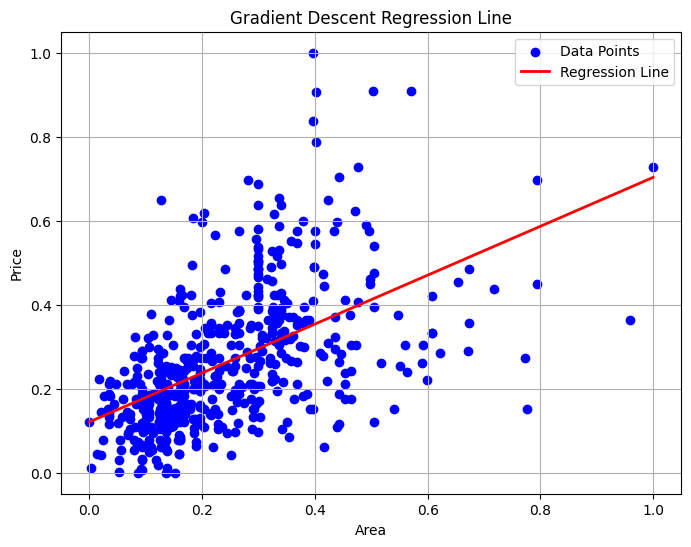

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(area_col_scaled, price_col_scaled, color="blue", label="Data Points")
(line,) = ax.plot([], [], color="red", linewidth=2, label="Regression Line")
ax.set_xlabel("Area")
ax.set_ylabel("Price")
ax.set_title("Gradient Descent Regression Line")
ax.legend()
ax.grid(True)

c = W[0][0]
m = W[1][0]

x_vals = np.array([X.min(), X.max()])
y_vals = m * x_vals + c
line.set_data(x_vals, y_vals)

# def animation_func(i):
#     W_curr = W_history[i]
#     c = W_curr[0][0]   # intercept
#     m = W_curr[1][0]   # slope
#     x_vals = np.array([X.min(), X.max()])
#     y_vals = m * x_vals + c
#     line.set_data(x_vals, y_vals)
#     return line,

# anim = FuncAnimation(fig, animation_func, frames=turns, interval=100, blit=True)

# print(W_history[:3])
plt.show()

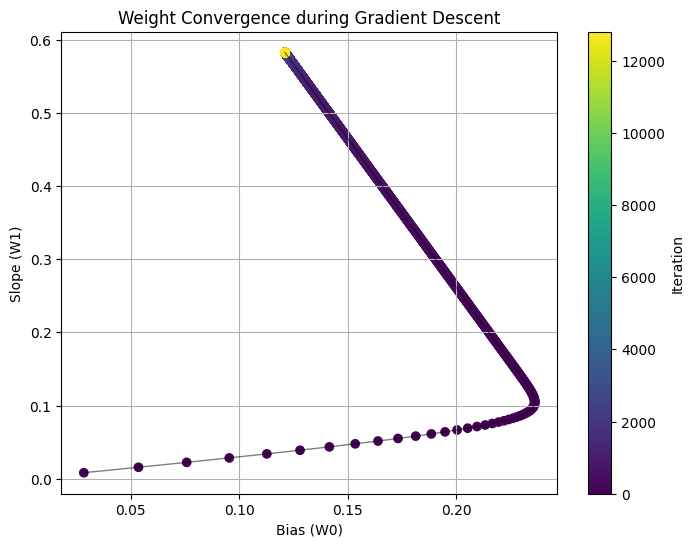

In [ ]:
# Scatter plot of weights
W_history_2d = W_history.squeeze()
plt.figure(figsize=(8, 6))
plt.scatter(
    W_history_2d[:, 0],
    W_history_2d[:, 1],
    c=np.arange(len(W_history_2d)),
    cmap="viridis",
)
plt.plot(
    W_history_2d[:, 0], W_history_2d[:, 1], color="black", linewidth=1, alpha=0.5
)  # path connecting points

plt.xlabel("Bias (W0)")
plt.ylabel("Slope (W1)")
plt.title("Weight Convergence during Gradient Descent")
plt.colorbar(label="Iteration")  # shows progression over time
plt.grid(True)
plt.show()

In [ ]:
for col in df.columns:
    num_unique = df[col].nunique()
    unique_vals = df[col].unique()
    print(f"Column: {col}")
    print(f"  Number of unique values: {num_unique}")

Column: price
  Number of unique values: 219
Column: area
  Number of unique values: 284
Column: bedrooms
  Number of unique values: 6
Column: bathrooms
  Number of unique values: 4
Column: stories
  Number of unique values: 4
Column: mainroad
  Number of unique values: 2
Column: guestroom
  Number of unique values: 2
Column: basement
  Number of unique values: 2
Column: hotwaterheating
  Number of unique values: 2
Column: airconditioning
  Number of unique values: 2
Column: parking
  Number of unique values: 4
Column: prefarea
  Number of unique values: 2
Column: furnishingstatus
  Number of unique values: 3


In [ ]:
binary_cols = [col for col in df.columns if df[col].nunique() == 2]
category_cols = [
    col for col in df.columns if df[col].nunique() > 2 and df[col].nunique() < 7
]
area_col = df["area"].values.reshape(-1, 1)
price_col = df["price"].values.reshape(-1, 1)
area_col_scaled = min_max_scaling(area_col)
price_col_scaled = min_max_scaling(price_col)

df_X = df.drop(columns=["area", "price"])

for col in binary_cols:
    df_X[col] = df_X[col].map({"yes": 1, "no": 0})
df_X = pd.get_dummies(df_X, columns=category_cols, drop_first=True, dtype=int)

# df_X.head()

X = np.hstack(
    (
        np.ones((area_col_scaled.shape[0], 1)),
        area_col_scaled.reshape((-1, 1)),
        df_X.values,
    )
)
Y = price_col_scaled.reshape((-1, 1))

print(X[:10])
print(Y[:10])

[[1.         0.39656357 1.         0.         0.         0.
  1.         1.         0.         0.         1.         0.
  0.         1.         0.         0.         0.         1.
  0.         0.         1.         0.         0.         0.        ]
 [1.         0.5024055  1.         0.         0.         0.
  1.         0.         0.         0.         1.         0.
  0.         0.         0.         1.         0.         0.
  1.         0.         0.         1.         0.         0.        ]
 [1.         0.57113402 1.         0.         1.         0.
  0.         1.         0.         1.         0.         0.
  0.         1.         0.         0.         1.         0.
  0.         0.         1.         0.         1.         0.        ]
 [1.         0.40206186 1.         0.         1.         0.
  1.         1.         0.         0.         1.         0.
  0.         1.         0.         0.         1.         0.
  0.         0.         0.         1.         0.         0.        ]
 [1.

In [ ]:
W= np.zeros((X.shape[1],1))
alpha=0.00001
turns=50000
W_history=[]
squared_loss_history=[]

for _ in range(turns):
  # Gradient Descent = 2*Transpose(X)*(X*W-Y)
  G=(2*X.T)@(X@W-Y)
  W=W-alpha*G
  W_history.append(W.copy())
  squared_loss=(X@W-Y).T@(X@W-Y)
  squared_loss_history.append(squared_loss[0][0])

W_history=np.array(W_history).squeeze()
squared_loss_history=np.array(squared_loss_history)




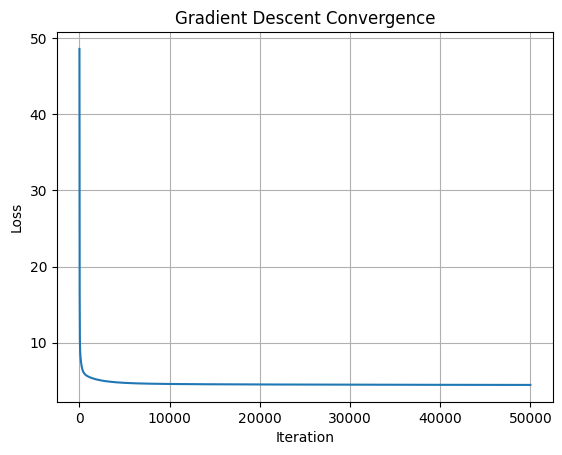

In [ ]:
plt.plot(squared_loss_history)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Gradient Descent Convergence")
plt.grid(True)
plt.show()

In [ ]:
# print(squared_loss)
def prediction(test,W):
  binary_cols = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']
  category_cols = [
      'bedrooms','bathrooms','stories','parking','furnishingstatus'
  ]
  area_col = test["area"].values.reshape(-1, 1)
  price_col = test["price"].values.reshape(-1, 1)
  area_col_scaled = (area_col-df['area'].min())/(df['area'].max()-df['area'].min())
  price_col_scaled = (price_col-df['price'].min())/(df['price'].max()-df['price'].min())

  df_X = test.drop(columns=["area", "price"])

  for col in binary_cols:
      df_X[col] = df_X[col].map({"yes": 1, "no": 0})
  df_X = pd.get_dummies(df, columns=category_cols, drop_first=True, dtype=int)

  # df_X.head()

  X = np.hstack(
      (
          np.ones((area_col_scaled.shape[0], 1)),
          area_col_scaled.reshape((-1, 1)),
          df_X.values,
      )
  )
  print(X[:5])
  Y = price_col_scaled.reshape((-1, 1))

  Y_pred=X@W

  squared_error = (Y_pred-Y)**2

  Y_final = min_max_inverse_scale(X@W, df['price'].min(), df['price'].max())
  return Y_final,squared_error




In [ ]:
sample = df[:5]
# print(W)
output,sq_error = prediction(sample,W)

result=pd.DataFrame({
    "Predicted Price":output.squeeze(),
    "Actual Price":sample['price'],
    "Squared Error":sq_error.squeeze()
})
print(result)





ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 5 and the array at index 2 has size 545